In [6]:
import pandas as pd
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns

## Remarques générales

Il faudrait peut etre ajouter le traffic routier moyen à Chicago selon les heures, les semaines et les mois pour le comparer au nombre d'accidents durant l'année : https://www.chicago.gov/city/en/dataset/traffic_counts.html

Il faudrait comparer le nombre d'accidents sous temps de pluie par rapport à la pluiviométrie sur une année pour voir si la pluie augmente considérablement le nombre d'accidents : https://fr.weatherspark.com/y/14091/M%C3%A9t%C3%A9o-habituelle-%C3%A0-Chicago-Illinois-%C3%89tats-Unis 

In [36]:
data2 = pd.read_csv(r"C:\Users\pierr\Documents\FISE A2\Data Science\Traffic accidents\chicago_crashes_cleaned_32.csv", sep= ",")
data = pd.read_csv(r"C:\Users\pierr\Documents\FISE A2\Data Science\Traffic accidents\Traffic_Crashes_-_Crashes Chicago.csv")

In [37]:
data2.head()

,Unnamed: 0,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,...,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,LATITUDE,LONGITUDE,CRASH_WEEKDAY,CRASH_HOUR,CRASH_Month,grid
0,3,2017-06-30 16:00:00,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,...,NOT APPLICABLE,8301,S,CICERO AVE,41.741804,-87.740954,4,16,6,"(10.0, 8.0)"
1,4,2019-03-21 22:50:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,DRY,...,UNABLE TO DETERMINE,8301,S,CICERO AVE,41.741804,-87.740954,3,22,3,"(10.0, 8.0)"
2,5,2018-03-26 14:23:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,DRY,...,UNABLE TO DETERMINE,3999,N,AVONDALE AVE,41.953647,-87.732082,0,14,3,"(11.0, 26.0)"
3,6,2018-08-30 17:45:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,...,IMPROPER LANE USAGE,600,W,DIVISION ST,41.903825,-87.643286,3,17,8,"(19.0, 22.0)"
4,7,2019-06-11 08:40:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN BARRIER,DRY,...,NOT APPLICABLE,50,E,GARFIELD BLVD,41.794779,-87.623828,1,8,6,"(21.0, 12.0)"


In [5]:
#Fonction pour tracer des bar graphs
def figfunc(x_, y_, title_, x_title, y_title, height_, width_):
    fig = go.Figure(go.Bar(
        x=x_,y=y_,marker={'color': y_, 
        'colorscale': 'Viridis'},
    ))
    fig.update_layout(title_text=title_,xaxis_title=x_title,yaxis_title=y_title,height=height_,width=width_,title_x=0.5)
    fig.show()
    return


In [41]:
data2.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,073682ef84ff827659552d4254ad1b98bfec24935cc9cc...,JB460108,NaN,10/02/2018 06:30:00 PM,10,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,18,3,10,NaN,NaN,NaN
1,1560fb8a1e32b528fef8bfd677d2b3fc5ab37278b157fa...,JC325941,NaN,06/27/2019 04:00:00 PM,45,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,16,5,6,NaN,NaN,NaN
2,c7e667807d86ff2e83da48267e1135680cad68c86eb00f...,JD150617,NaN,02/13/2020 04:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,1.0,2.0,0.0,16,5,2,NaN,NaN,NaN
3,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
4,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,JC194776,NaN,03/21/2019 10:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,0.0,0.0,2.0,0.0,22,5,3,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)


## 1) Impact of the Weather conditions

In [59]:
#On calcule le nombre d'accidents en fonction des conditions météo
AccByWeatherConditions = data2.groupby(['LIGHTING_CONDITION']).agg('count')['CRASH_RECORD_ID'].sort_values(ascending=False)[:30].to_frame(name='totalAccidents').reset_index()


In [60]:
figfunc(
    x_ = AccByWeatherConditions['LIGHTING_CONDITION'],
    y_ = AccByWeatherConditions['totalAccidents'],
    title_="Nombre d'accidents en fonction des conditions météo",       
    x_title="Conditions météo", y_title="Nombre total d'accidents", 
    height_=600, width_=600)

In [78]:
AccNuit = data['LIGHTING_CONDITION'].value_counts()[1] + data['LIGHTING_CONDITION'].value_counts()[2]
AccTot = len(data) - data['LIGHTING_CONDITION'].value_counts()[3]
print("Les accidents de nuit représente ", AccNuit/AccTot*100, "% des accidents totaux" )

Les accidents de nuit représente  26.95445599897523 % des accidents totaux


Bien que le traffic routier de nuit représente que 10% du traffic routier total, il représente près de 27% des accidents totaux. Il y a alors un risque plus important des accidents la nuit. 

In [97]:
#On dtle nombre moyen le plus important de d'insultes, de points d'exclation, d'intérroagtion, de mots en majuscule, de mots allongés 
#selon la catégorie du média
list_to_change = ['WEATHER_CONDITION', 'ROADWAY_SURFACE_COND']


for i in range (len(list_to_change)):
  nbrTotal = data2.groupby([list_to_change[i]]).agg('count')['CRASH_RECORD_ID'].to_frame(name='total').reset_index()

  fig = go.Figure([go.Pie(labels=nbrTotal[[list_to_change[i]]],values=nbrTotal['total'])])

  fig.update_traces(hoverinfo='label+percent', textfont_size=15)
  fig.update_layout(title=list_to_change[i] + " selon les catégorie de média", title_x=0.5, height=600)
  fig.show()

Il semble que la pluie ne soit pas un si grand danger. Du moins, les jours de pluie ne représente pas une partie beaucoup plus importante que le reste

### 2) Device conditions

In [85]:
#On calcule le nombre d'accidents en fonction des états des dispositifs
AccByDeviceConditions = data2.groupby(['DEVICE_CONDITION']).agg('count')['CRASH_RECORD_ID'].sort_values(ascending=False)[:30].to_frame(name='totalAccidents').reset_index()

In [90]:
figfunc(
    x_ = AccByDeviceConditions['DEVICE_CONDITION'],
    y_ = AccByDeviceConditions['totalAccidents'],
    title_="Nombre d'accidents en fonction des états des dispositifs", 
    x_title="Device conditions", y_title="Nombre total d'accidents", 
    height_=600, width_=600)

Seul 0.005% des accidents ont été causé en parti par des défauts de la signalisation. 
58% des accidents ont lieu sur des espaces sans control. Faut-il augmenter le nombre de control ? Qu'est ce que cela veut dire exactement ? 

In [ ]:
nbrTotal = data2.groupby(['categorie_new']).agg('mean')[list_to_change[i]].sort_values(ascending=False)[:30].to_frame(name='total').reset_index()

  fig = go.Figure([go.Pie(labels=nbrTotal['categorie_new'],values=nbrTotal['total'])])

  fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15)
  fig.update_layout(title=list_to_change[i] + " selon les catégorie de média", title_x=0.5)
  fig.show()

## 2) Répartition des accidents sur l'année, mois

In [14]:
data.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,073682ef84ff827659552d4254ad1b98bfec24935cc9cc...,JB460108,NaN,10/02/2018 06:30:00 PM,10,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,18,3,10,NaN,NaN,NaN
1,1560fb8a1e32b528fef8bfd677d2b3fc5ab37278b157fa...,JC325941,NaN,06/27/2019 04:00:00 PM,45,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,16,5,6,NaN,NaN,NaN
2,c7e667807d86ff2e83da48267e1135680cad68c86eb00f...,JD150617,NaN,02/13/2020 04:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,1.0,2.0,0.0,16,5,2,NaN,NaN,NaN
3,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
4,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,JC194776,NaN,03/21/2019 10:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,0.0,0.0,2.0,0.0,22,5,3,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)


In [22]:
#converting date column from str to date
data2['date']=pd.to_datetime(data2['CRASH_DATE'])
data2['year'] = pd.DatetimeIndex(data2['CRASH_DATE']).year
data2['month'] = pd.DatetimeIndex(data2['CRASH_DATE']).month
data2['month_year']= pd.to_datetime(data2['CRASH_DATE']).dt.to_period('M')
data2['weekdays']=data2['CRASH_DATE'].dt.strftime('%A') 

count_year= data2.groupby(['year']).agg('count')['id'].to_frame(name='count').reset_index()
count_year= data2.groupby(['year']).agg('count')['id'].to_frame(name='count').reset_index()

KeyboardInterrupt: 

In [33]:
data['CRASH_Year'] = pd.DatetimeIndex(data['CRASH_DATE']).year

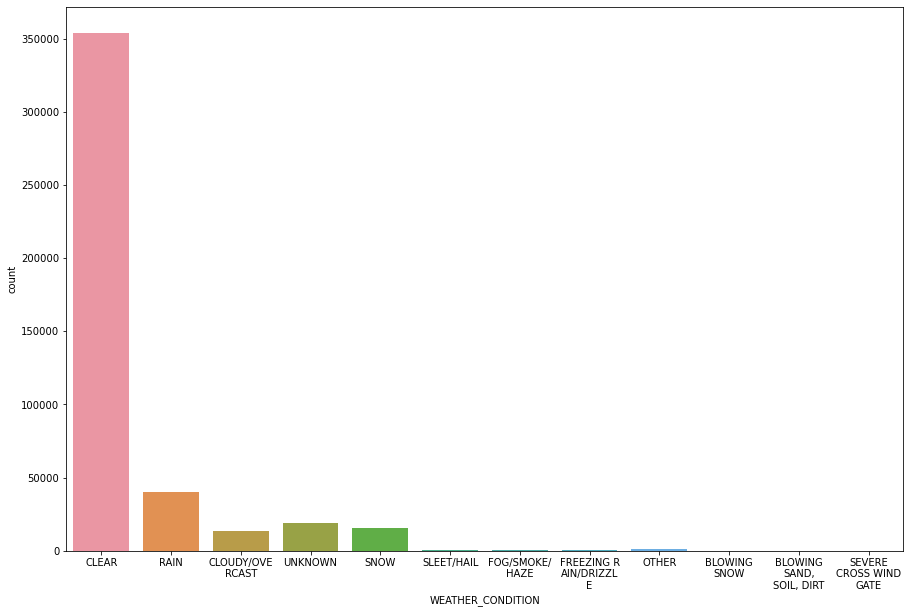

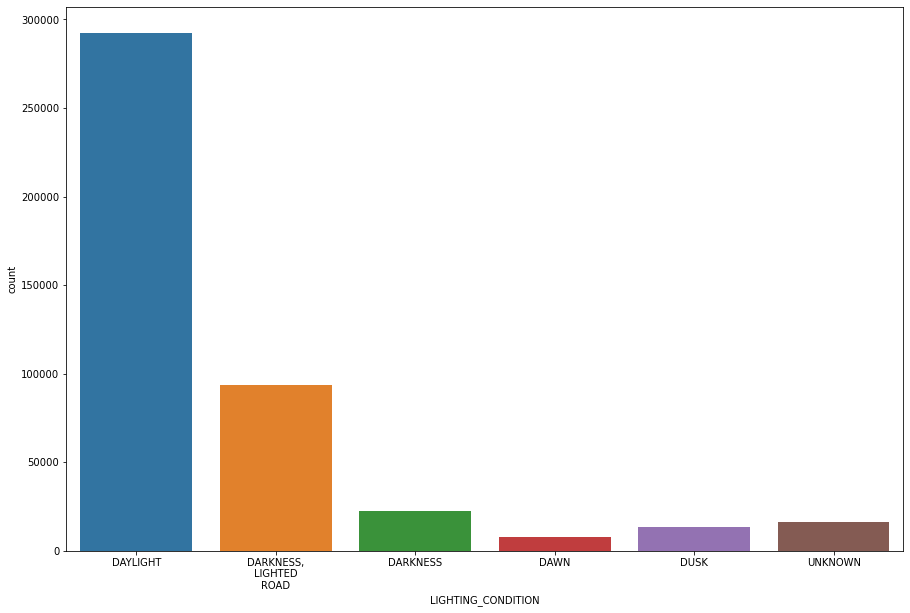

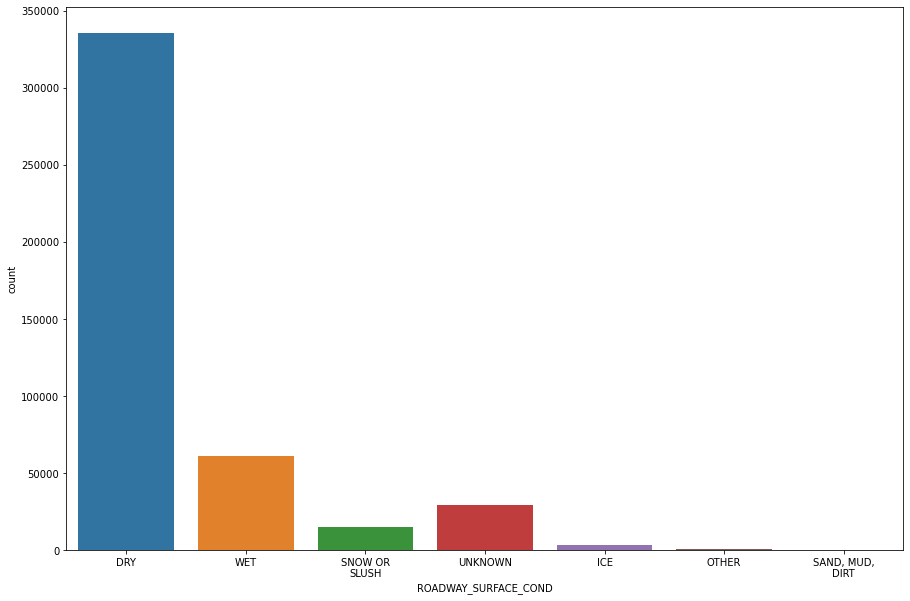

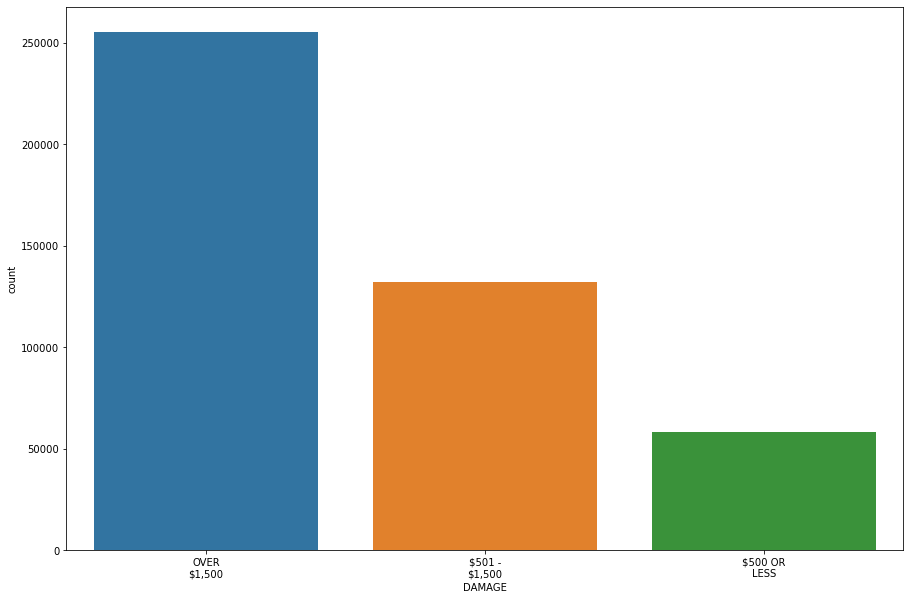

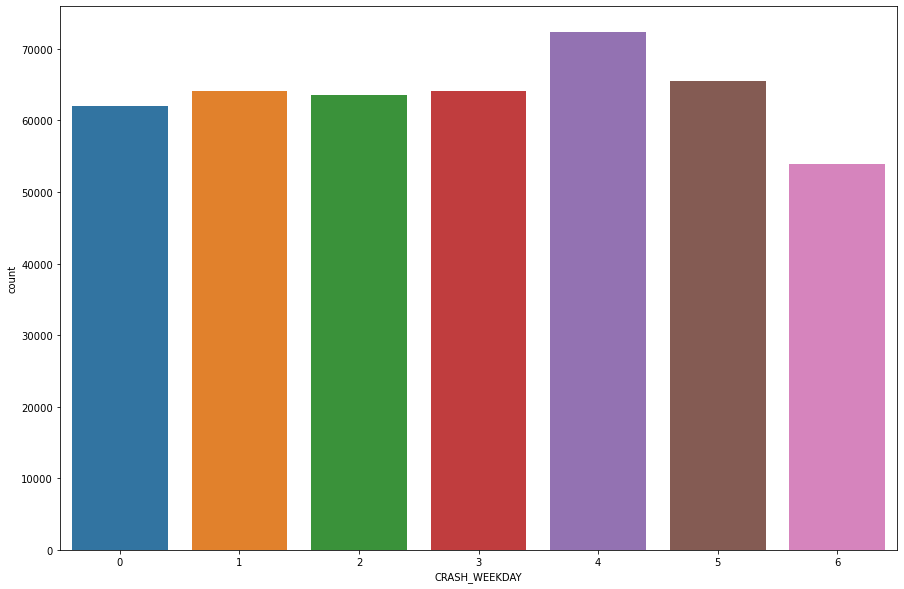

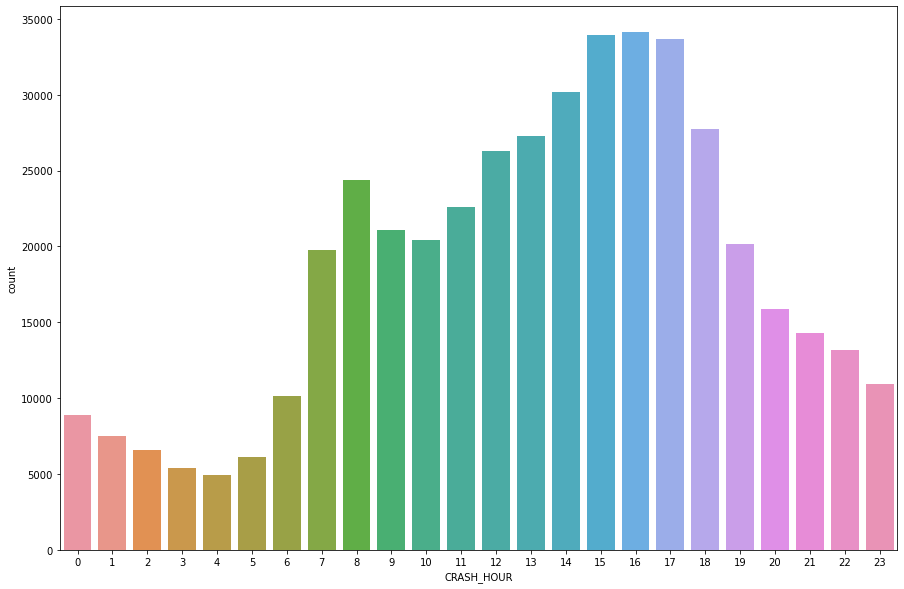

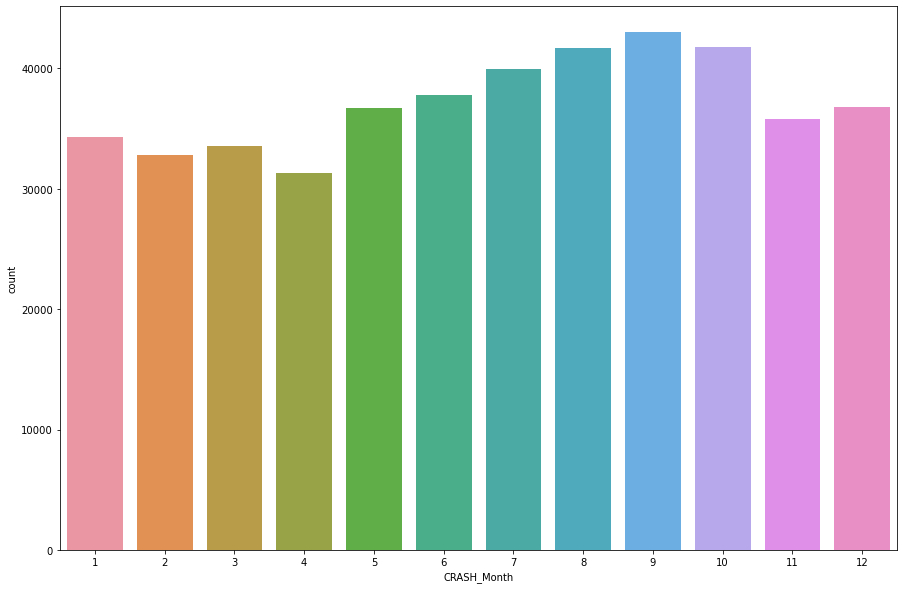

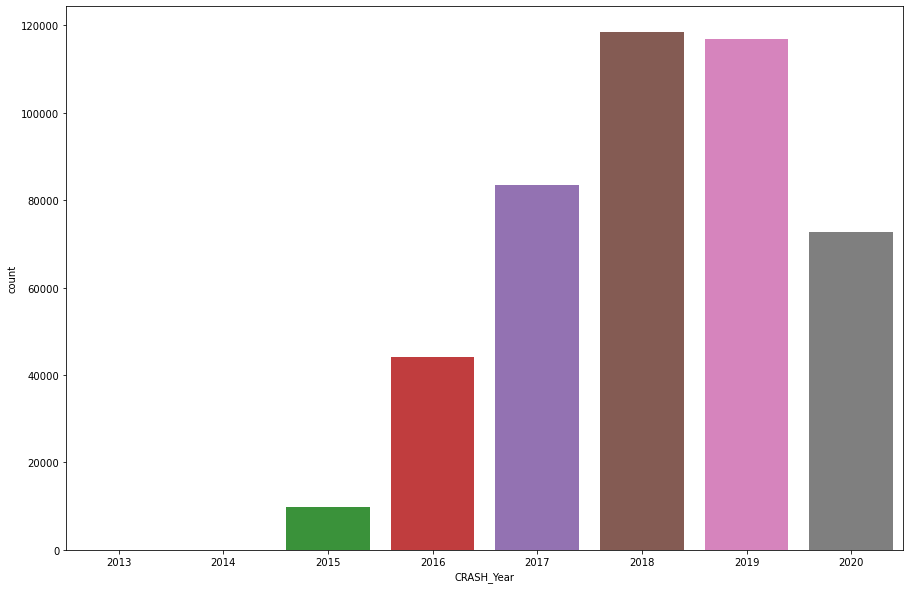

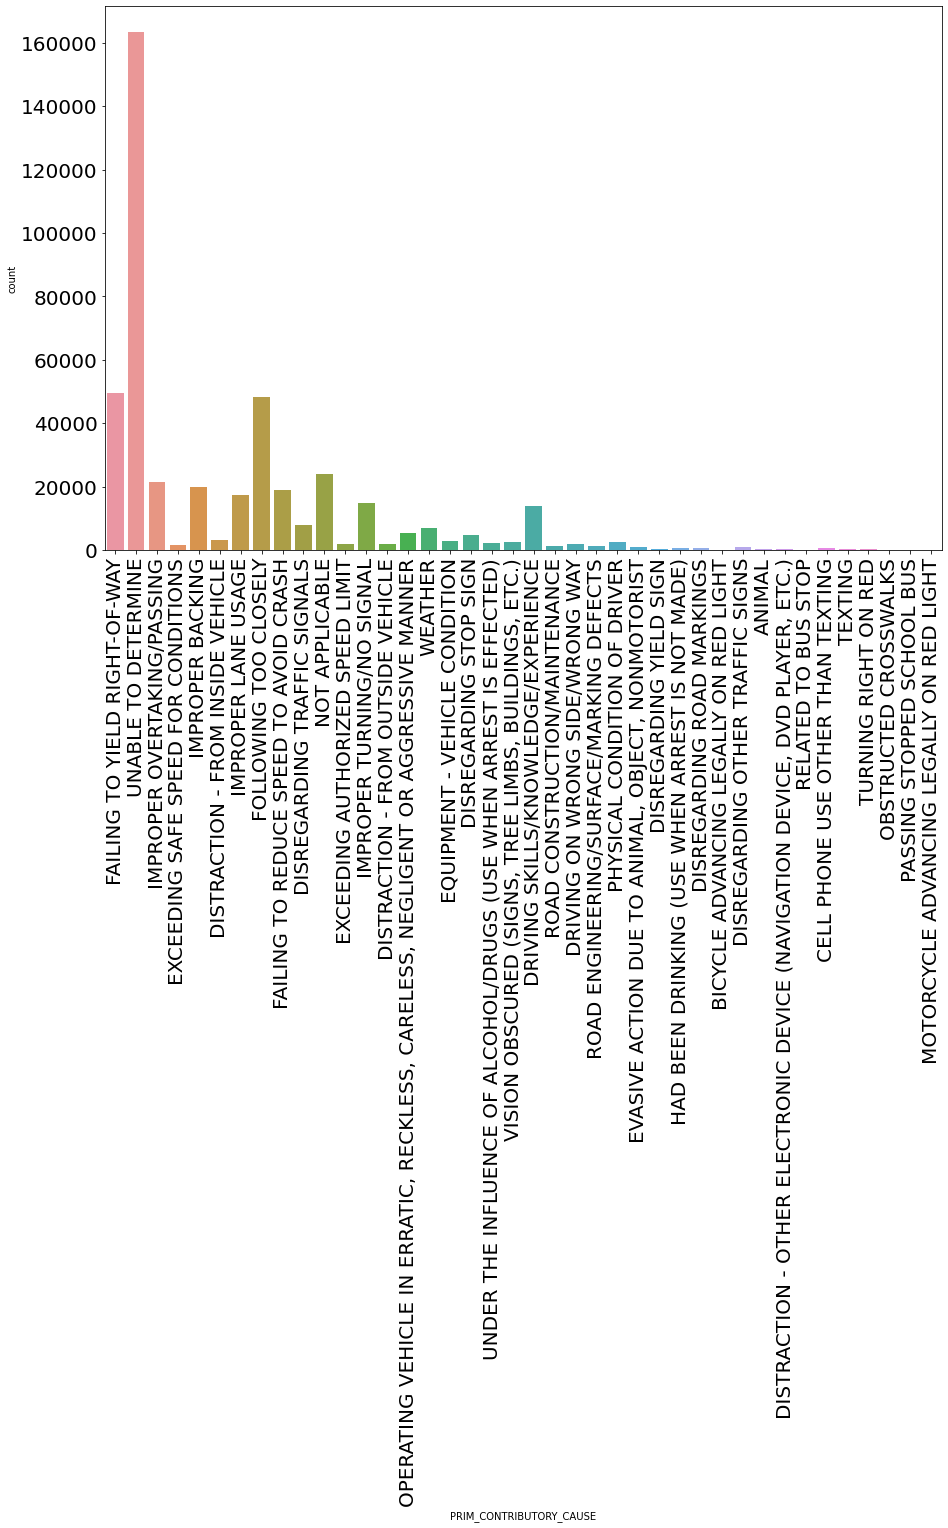

In [32]:
import textwrap
cols = ['WEATHER_CONDITION', 'LIGHTING_CONDITION',\
        'ROADWAY_SURFACE_COND', 'DAMAGE',\
       'CRASH_WEEKDAY', 'CRASH_HOUR', 'CRASH_Month',                  'CRASH_Year']

max_width = 10

for i, col in enumerate(data[cols]):
    plt.figure(i, figsize = (15.0,10.0))
    b = sns.countplot(x=col, data=data)
    b.tick_params(labelsize=10)
    b.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in b.get_xticklabels())

plt.figure(10, figsize = (15.0,10.0))
b = sns.countplot(x=data['PRIM_CONTRIBUTORY_CAUSE'], data=data)
b.tick_params(labelsize=20)
b.set_xticklabels(b.get_xticklabels(), rotation = 90)

print("")


In [13]:
data.head()

,Unnamed: 0,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,...,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,LATITUDE,LONGITUDE,CRASH_WEEKDAY,CRASH_HOUR,CRASH_Month,grid
0,3,2017-06-30 16:00:00,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,...,NOT APPLICABLE,8301,S,CICERO AVE,41.741804,-87.740954,4,16,6,"(10.0, 8.0)"
1,4,2019-03-21 22:50:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,DRY,...,UNABLE TO DETERMINE,8301,S,CICERO AVE,41.741804,-87.740954,3,22,3,"(10.0, 8.0)"
2,5,2018-03-26 14:23:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,DRY,...,UNABLE TO DETERMINE,3999,N,AVONDALE AVE,41.953647,-87.732082,0,14,3,"(11.0, 26.0)"
3,6,2018-08-30 17:45:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,...,IMPROPER LANE USAGE,600,W,DIVISION ST,41.903825,-87.643286,3,17,8,"(19.0, 22.0)"
4,7,2019-06-11 08:40:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN BARRIER,DRY,...,NOT APPLICABLE,50,E,GARFIELD BLVD,41.794779,-87.623828,1,8,6,"(21.0, 12.0)"


In [88]:
#removing conditions like 'unkown' and those which do not occur in large number
data_vis=data
data_vis = data_vis.loc[data_vis['WEATHER_CONDITION']\
                        .isin(['CLEAR', 'RAIN', 'CLOUDY/OVERCAST', 'SNOW'])]
data_vis = data_vis.loc[~data_vis['LIGHTING_CONDITION']\
                        .isin(['UNKNOWN'])]
data_vis = data_vis.loc[data_vis['ROADWAY_SURFACE_COND']\
                        .isin(['DRY', 'WET', 'SNOW OR SLUSH'])]

data_vis = data_vis.loc[data_vis['INJURIES_TOTAL']\
                        .isin(['0.0', '1.0', '2.0', '3.0'])]

data_vis = data_vis.loc[data_vis['INJURIES_FATAL']\
                        .isin(['1.0', '2.0', '3.0'])]



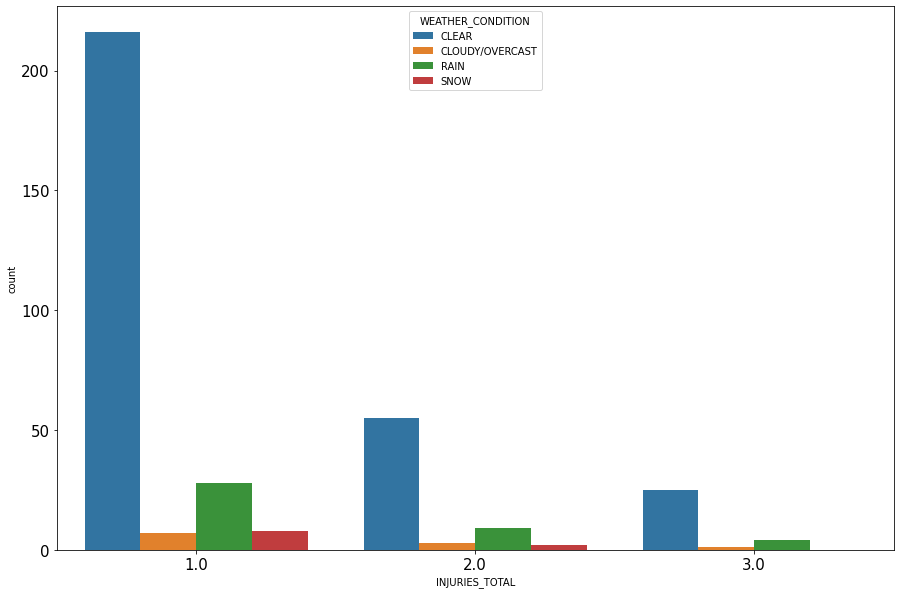

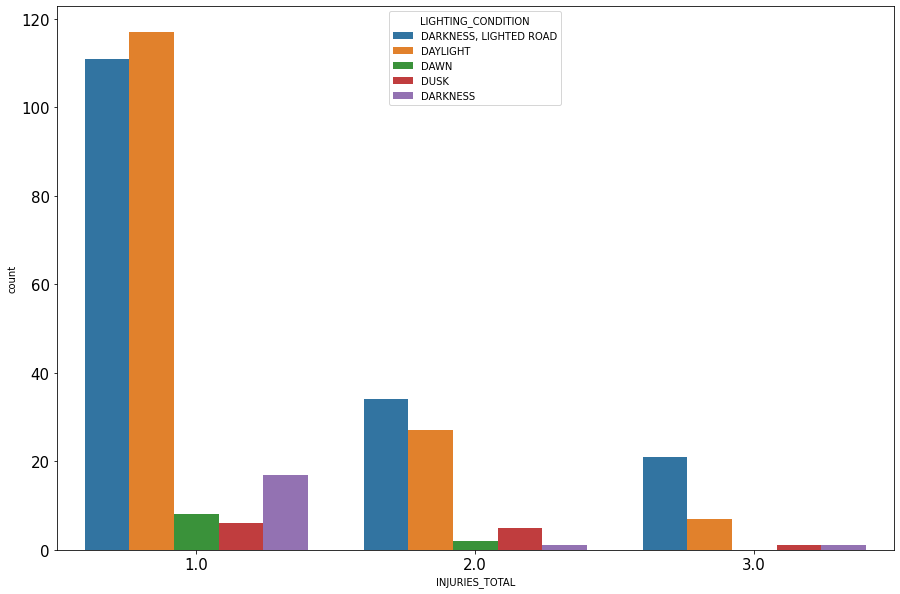

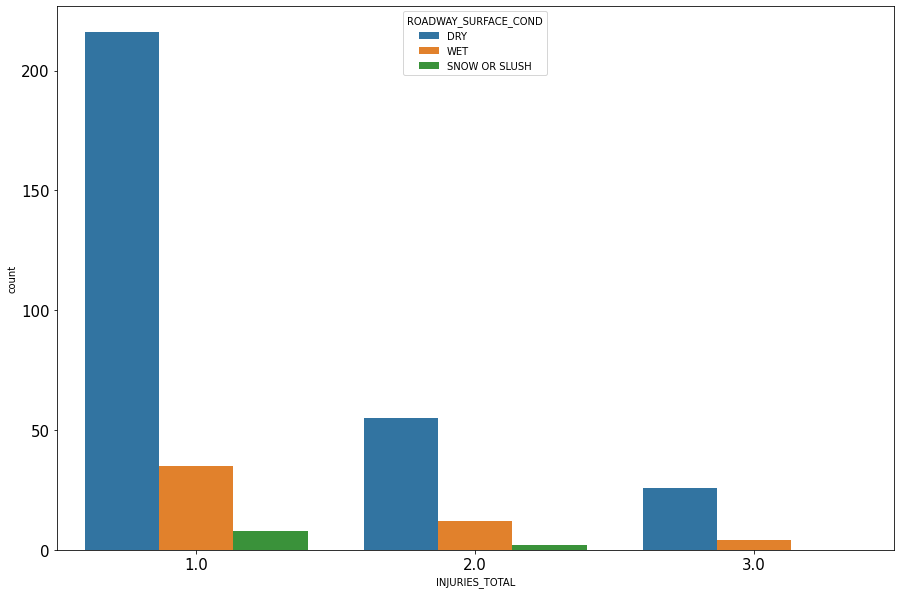

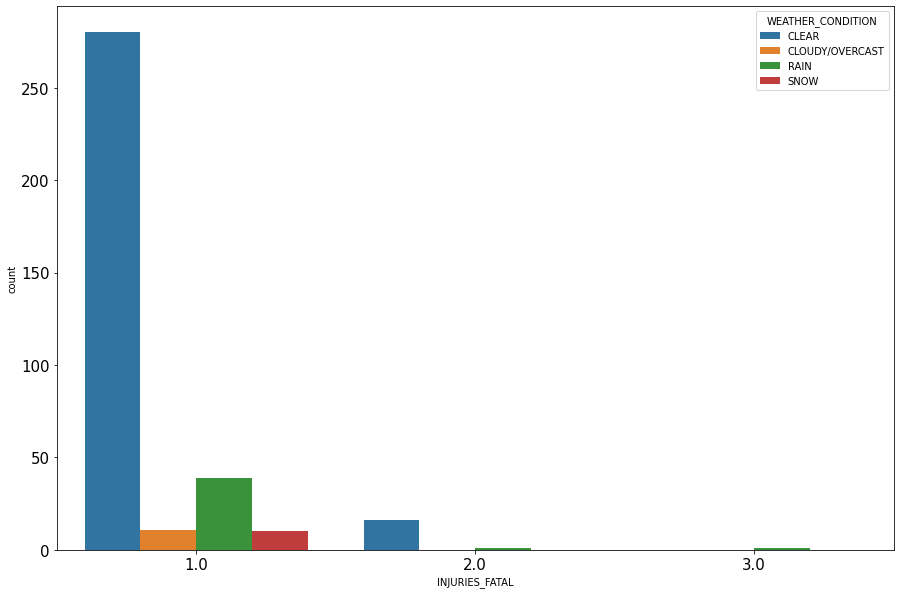

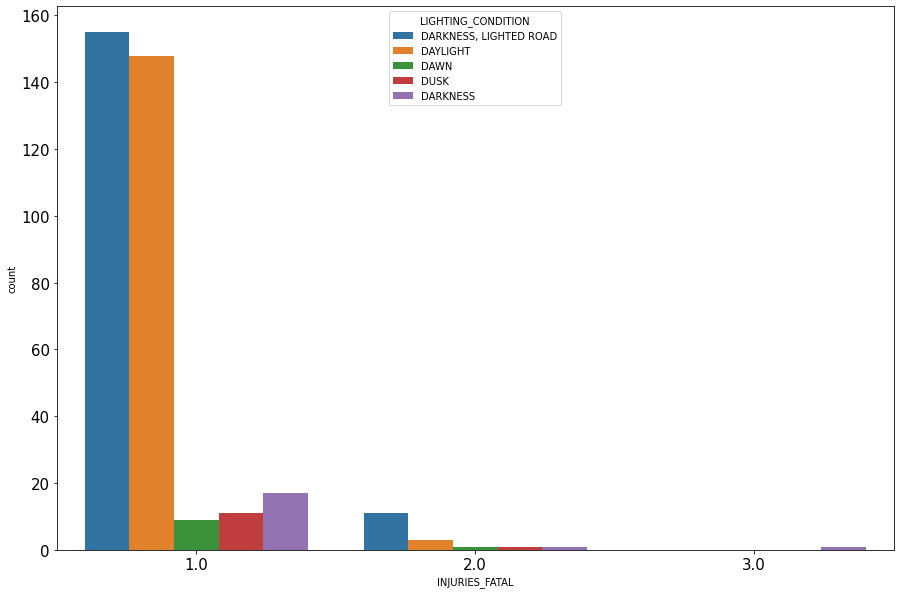

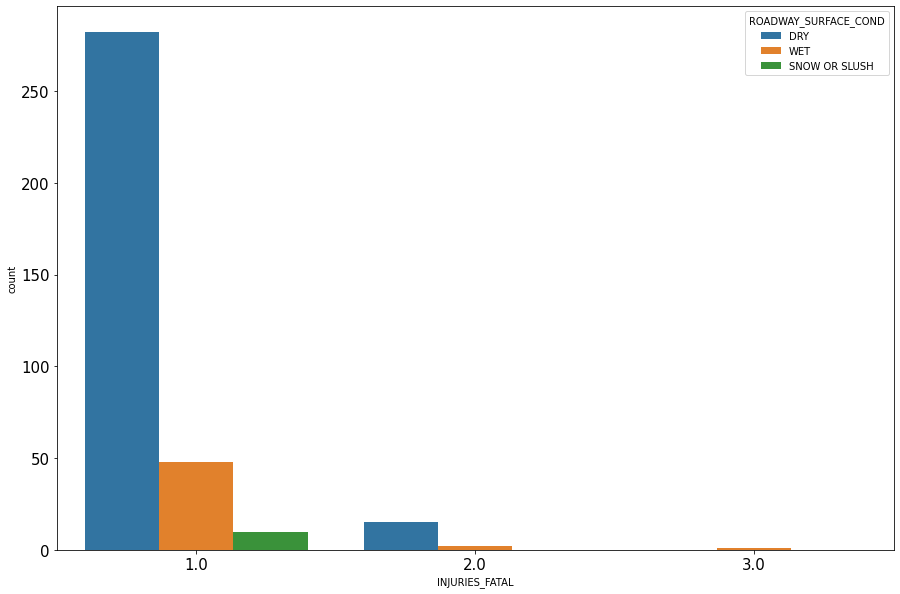

In [89]:
cols = ['INJURIES_TOTAL', 'INJURIES_FATAL']

hues = ['WEATHER_CONDITION', 'LIGHTING_CONDITION',\
        'ROADWAY_SURFACE_COND']

max_width = 10

i=0
for col in data_vis[cols]:
    for hue in data_vis[hues]:
        plt.figure(i, figsize=(15.0,10.0))
        b = sns.countplot(x=col, hue=hue, data=data_vis)
        b.tick_params(labelsize=15)
        b.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in b.get_xticklabels())
        i+=1

L'obscurité et la poussière sont des causes d'accidents graves. Ils augmentent de manière considérable le nombre de blessés et donc les frais pour les assurances. 

In [52]:
data['INJURIES_FATAL'].value_counts()

0.0    446558
1.0       395
2.0        24
3.0         5
4.0         1
Name: INJURIES_FATAL, dtype: int64

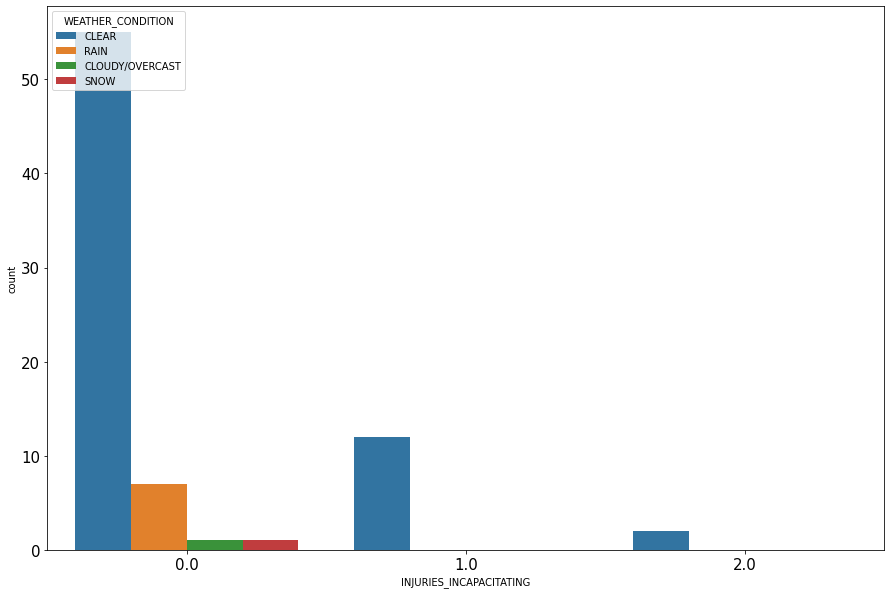

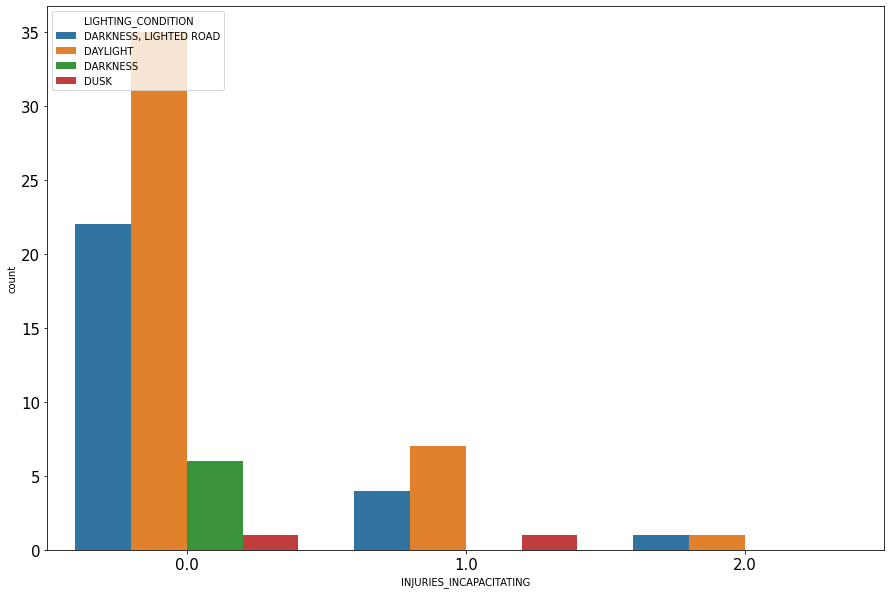

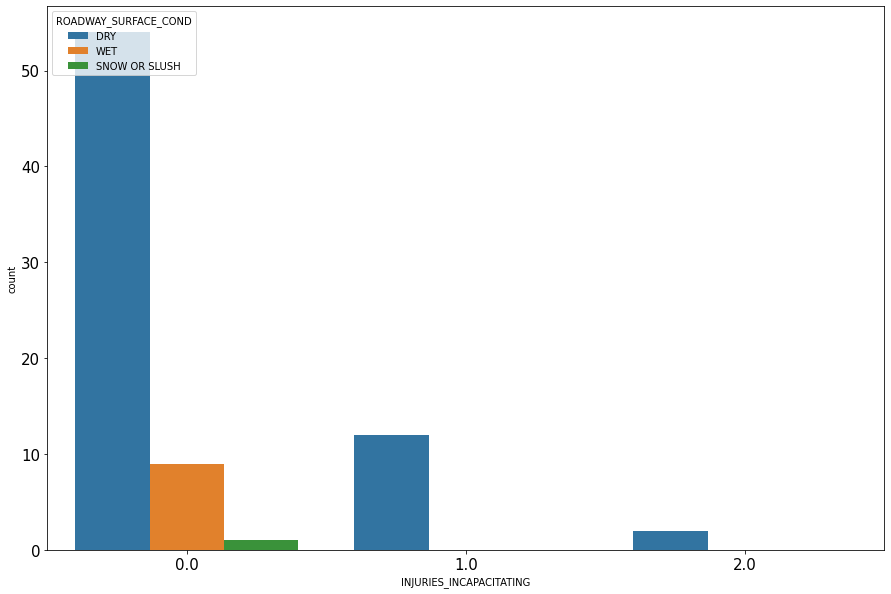

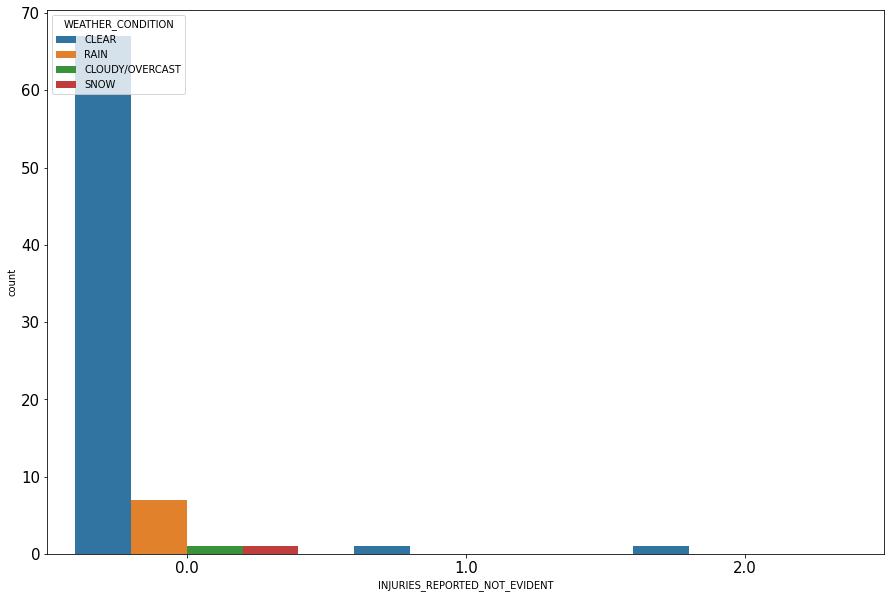

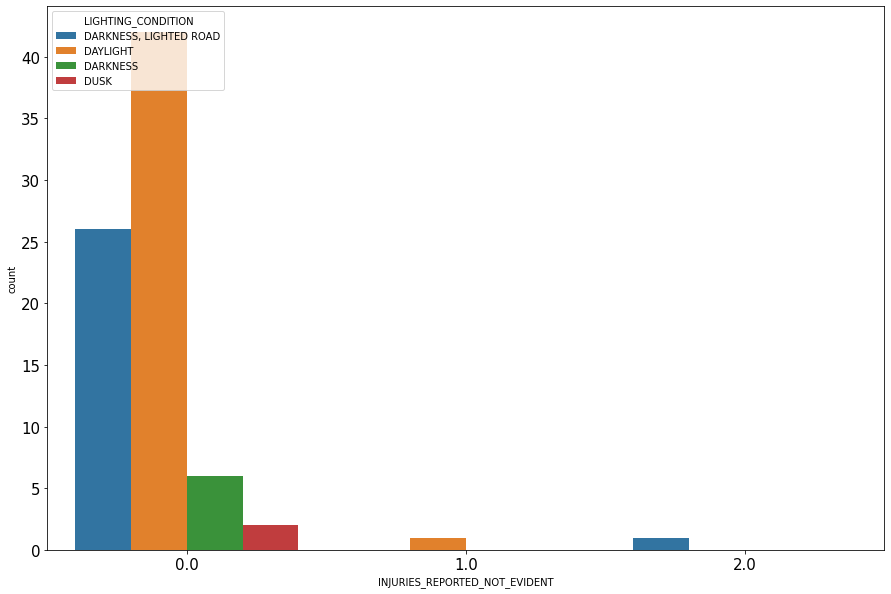

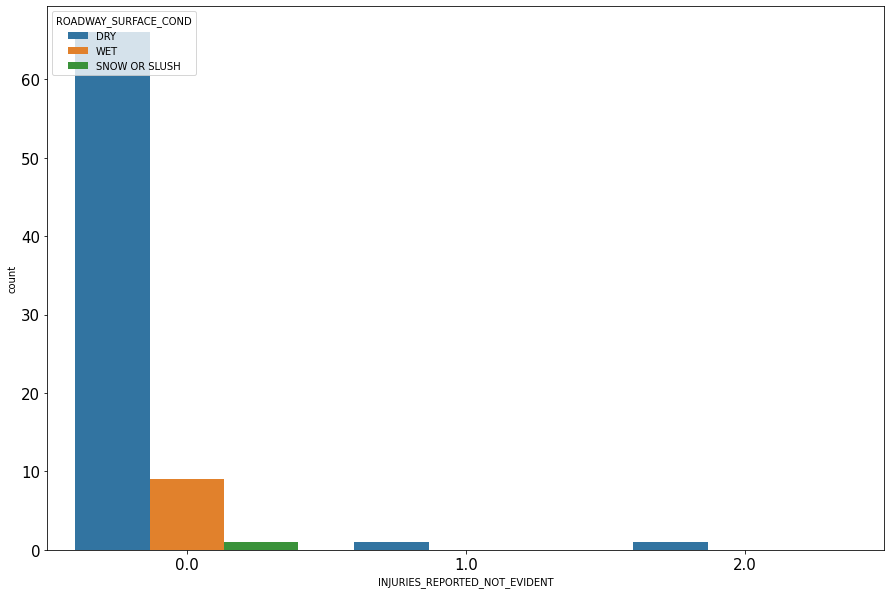

In [86]:
cols = ['INJURIES_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT']

hues = ['WEATHER_CONDITION', 'LIGHTING_CONDITION',\
        'ROADWAY_SURFACE_COND']

max_width = 10

i=0
for col in data_vis[cols]:
    for hue in data_vis[hues]:
        plt.figure(i, figsize=(15.0,10.0))
        b = sns.countplot(x=col, hue=hue, data=data_vis)
        b.tick_params(labelsize=15)
        b.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in b.get_xticklabels())
        i+=1